In [8]:
import sys
sys.path.append('../')

from FeatureModels import *
from xgboost import XGBRegressor

In [9]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%autoreload 2 

In [11]:
sensor = 's'
fill = '_fill'

district = 'Mean'

#savePath = 'Results/Results RF large periods.xlsx'

In [12]:
params = { 
    'n_estimators': np.linspace(10, 1000, 6).round().astype('int'),
    'max_depth' : [2, 3, 4],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.5, 0.8],
    'subsample': [0.5, 1.0],
}
params

{'n_estimators': array([  10,  208,  406,  604,  802, 1000]),
 'max_depth': [2, 3, 4],
 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8],
 'subsample': [0.5, 1.0]}

## Модели, обученные за года

In [13]:
model = XGBRegressor(random_state = 100)

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,CV,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 604, 'subsample': 0.5}",,,
MSE,177.03,292.19,433.74
MAE,8.17,9.82,15.85
MAPE,0.57,0.61,0.48
R2,0.81,0.69,0.67


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.16it/s]


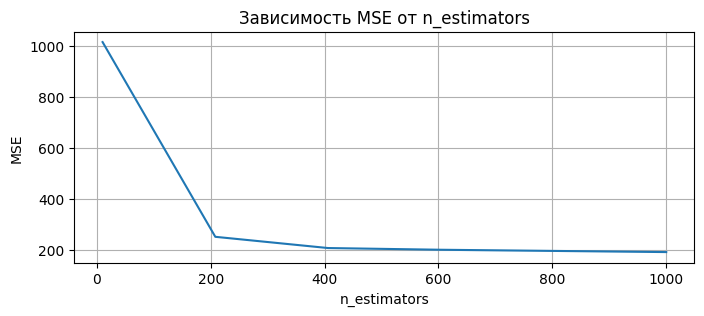

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.29it/s]


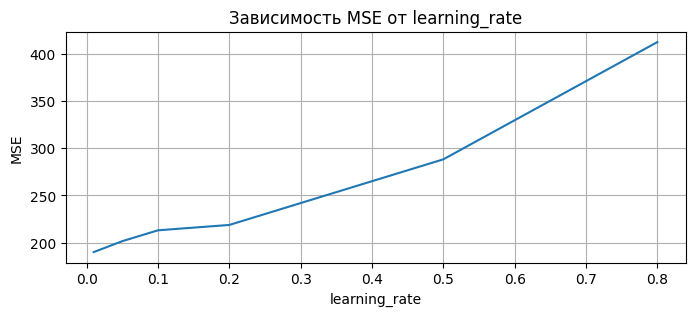

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,CV,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 604, 'subsample': 0.5}",,,
MSE,177.03,292.19,63.30
MAE,8.17,9.82,6.22
MAPE,0.57,0.61,0.50
R2,0.81,0.69,0.34


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.44it/s]


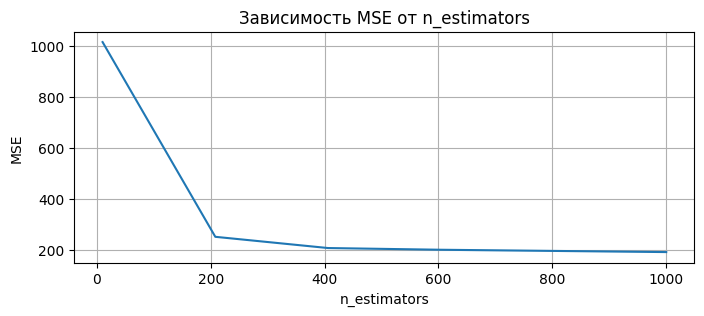

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.28it/s]


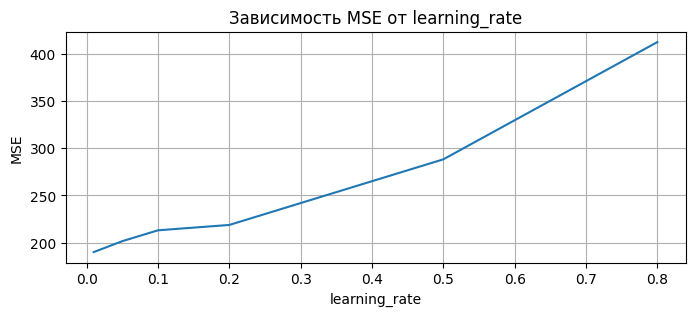

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,CV,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 604, 'subsample': 0.5}",,,
MSE,177.03,292.19,55.22
MAE,8.17,9.82,6.41
MAPE,0.57,0.61,0.84
R2,0.81,0.69,-0.13


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.98it/s]


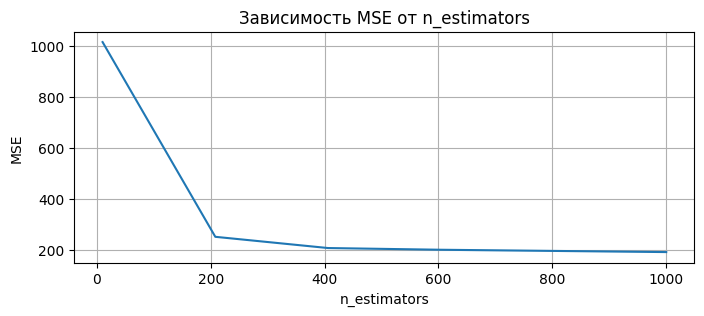

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.15s/it]


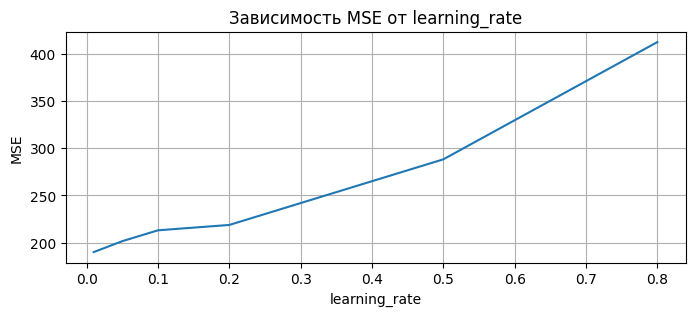

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,CV,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 604, 'subsample': 0.5}",,,
MSE,177.03,292.19,42.46
MAE,8.17,9.82,5.81
MAPE,0.57,0.61,0.84
R2,0.81,0.69,0.05


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.58it/s]


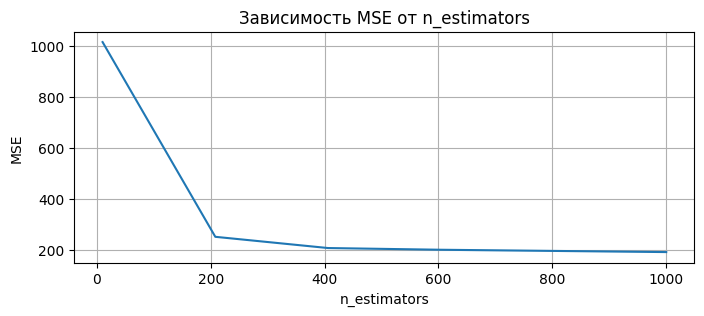

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.30it/s]


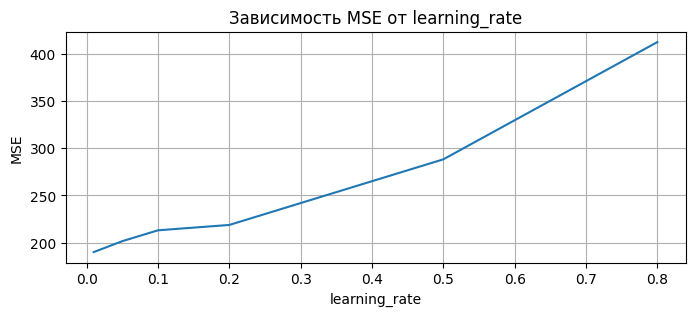

In [14]:
# Срез данных от begin до end
begin, end = '2019-01-01', '2023-04-06'

for season in ['winters', 'springs', 'summers', 'autumns']:
    ModelProcessing(model, sensor, fill, district, begin, end, seasonModel = '', season_test = season, params = params, gridSearch = True, paramDependencies = ['n_estimators', 'learning_rate'], plotRes = False, featImp = False)#, savePath = 'Results/Results xgb.xlsx')

## Сезонные модели

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,CV,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,380.74,737.38,412.25
MAE,13.29,17.88,15.20
MAPE,0.43,0.51,0.51
R2,0.81,0.65,0.69


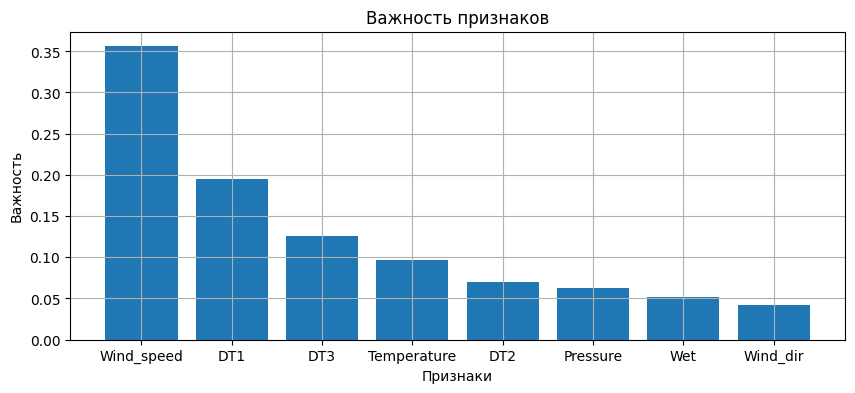

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,CV,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 604, 'subsample': 0.5}",,,
MSE,23.13,50.61,38.73
MAE,3.69,5.30,4.35
MAPE,0.31,0.42,0.35
R2,0.81,0.57,0.60


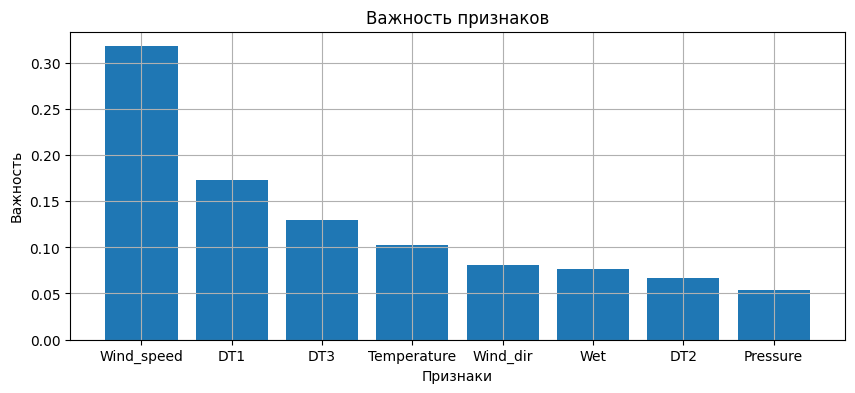

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,CV,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,11.81,29.64,22.62
MAE,2.40,3.77,3.52
MAPE,0.31,0.50,0.41
R2,0.66,0.13,0.54


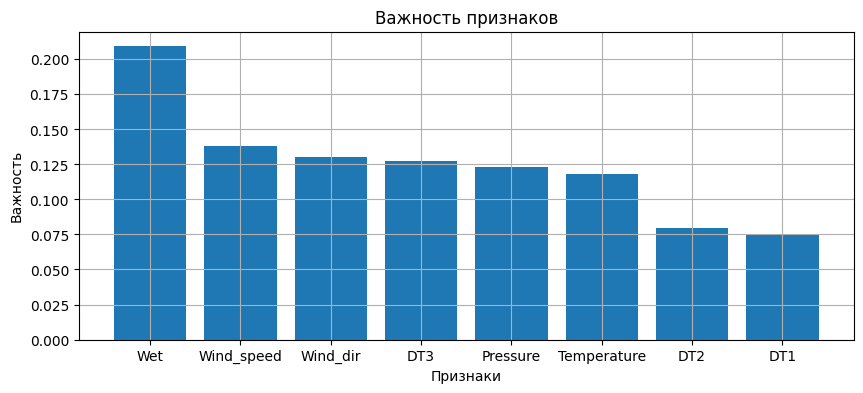

Пропуски в Wind_dir : 1
Пропуски в Wind_speed : 1


,Train,CV,Test
"2019-01-01 — 2023-03-22 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 406, 'subsample': 0.5}",,,
MSE,9.21,35.10,19.42
MAE,2.23,3.92,3.55
MAPE,0.27,0.44,0.52
R2,0.85,0.37,0.56


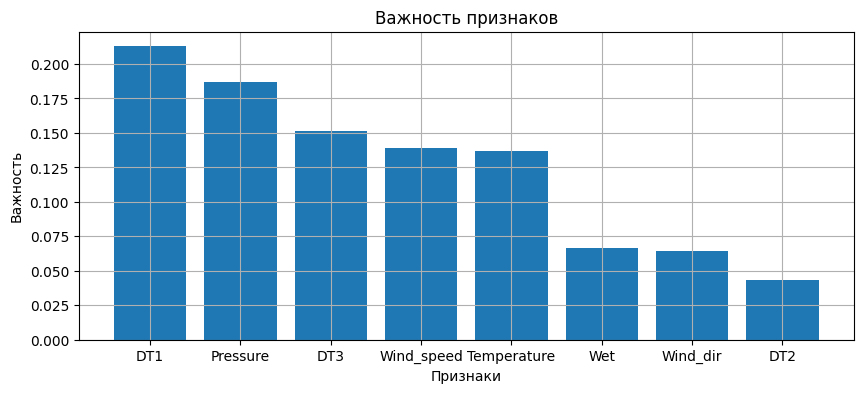

In [7]:
begin, end = '2019-01-01', '2023-04-06'

for season in ['winters', 'springs', 'summers', 'autumns']:
    ModelProcessing(model, sensor, fill, district, begin, end, seasonModel = season, season_test = season, params = params, gridSearch = True, paramDependencies = [], plotRes = False, featImp = True)#, savePath = 'Results/Results xgb.xlsx')